In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
encoder = LabelEncoder()

In [ ]:
heart = pd.read_csv("/content/Heart Attack.csv")

In [ ]:
heart.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


In [ ]:
heart.duplicated().sum()

0

In [ ]:
df = heart.copy()
num_obs = len(df)
num_true = len(df.loc[df['class'] == 'positive'])
num_false = len(df.loc[df['class'] == 'negative'])
print("Number of True cases:  {0} ({1:2.2f}%)".format(num_true, ((1.00 * num_true)/(1.0 * num_obs)) * 100))
print("Number of False cases: {0} ({1:2.2f}%)".format(num_false, (( 1.0 * num_false)/(1.0 * num_obs)) * 100))

Number of True cases:  810 (61.41%)
Number of False cases: 509 (38.59%)


In [ ]:
categorical_columns = heart[["gender", "class"]]

In [ ]:
# Check number of categories in each column
for column in categorical_columns.columns:
    print(f"Column: {column}")
    print(categorical_columns[column].value_counts())
    print()

Column: gender
gender
1    870
0    449
Name: count, dtype: int64

Column: class
class
positive    810
negative    509
Name: count, dtype: int64



In [ ]:
df = heart.copy()
le_model = LabelEncoder()

df['class'] = le_model.fit_transform(df['class'])

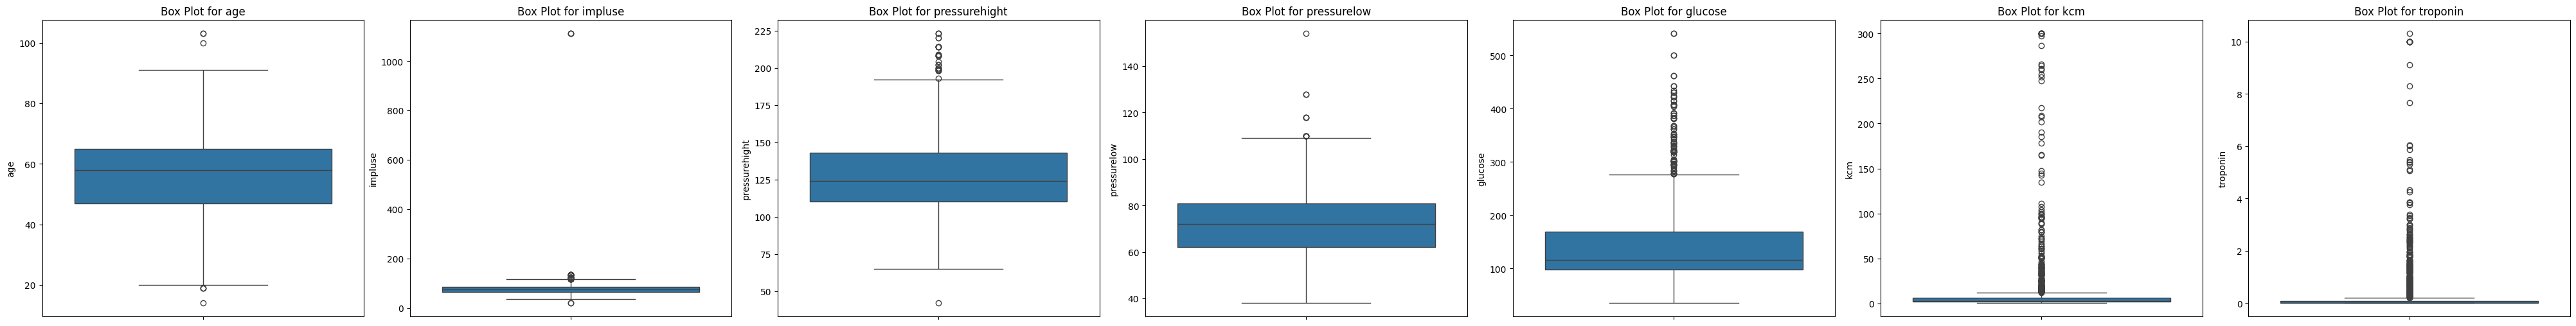

In [ ]:
#Identifikasi outlier
numeric_columns = df.columns.drop(['class', 'gender'])
fig, axs = plt.subplots(ncols=len(numeric_columns), figsize=(40, 5))

for i, column in enumerate(numeric_columns):
    sns.boxplot(y=column, data=df, ax=axs[i], whis=1.5)
    axs[i].set_title(f'Box Plot for {column}')
    axs[i].set_xlabel('')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [ ]:
from scipy.stats.mstats import winsorize

# Winsorize setiap kolom
for column in numeric_columns:
    df[column] = winsorize(df[column], limits=[0.2, 0.2])

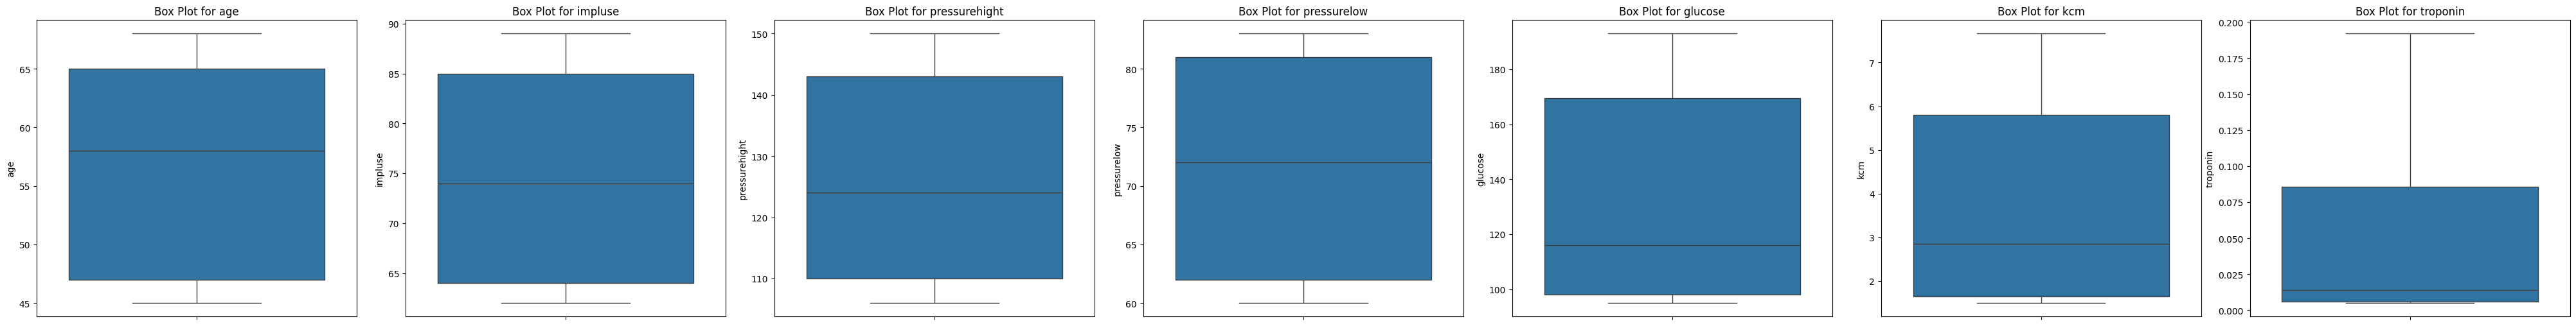

In [ ]:
#Identifikasi outlier
numeric_columns = df.columns.drop(['class', 'gender'])
fig, axs = plt.subplots(ncols=len(numeric_columns), figsize=(40, 5))

for i, column in enumerate(numeric_columns):
    sns.boxplot(y=column, data=df, ax=axs[i], whis=1.5)
    axs[i].set_title(f'Box Plot for {column}')
    axs[i].set_xlabel('')

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [ ]:
# Separate df_onehot to be X and y
X = df.drop(columns=['class'])  # Features
y = df['class']  # Target variable

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)
importances = model.feature_importances_

# Mengurutkan fitur berdasarkan pentingnya
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print(f"{X.columns[indices[f]]}: {importances[indices[f]]}")



troponin: 0.5802778247618666
kcm: 0.2703229847016507
age: 0.04654372672513036
glucose: 0.026223954418660884
pressurehight: 0.024005551258062148
pressurelow: 0.022591856977338363
impluse: 0.021258749924874986
gender: 0.008775351232415901


In [ ]:
# Mendapatkan pentingnya fitur
importances = model.feature_importances_

# Mengurutkan fitur berdasarkan pentingnya
indices = np.argsort(importances)[::-1]

# Mendapatkan nama kolom dari 5 fitur teratas
top_features = [X.columns[indices[f]] for f in range(6)]
top_features

['troponin', 'kcm', 'age', 'glucose', 'pressurehight', 'pressurelow']

In [ ]:
selected_features = df[['age','troponin', 'kcm', 'glucose', 'pressurehight', 'pressurelow', 'class']]

In [ ]:
selected_features

,age,troponin,kcm,glucose,pressurehight,pressurelow,class
0,64,0.012,1.80,160.0,150,83,0
1,45,0.192,6.75,193.0,106,60,1
2,55,0.005,1.99,193.0,150,77,0
3,64,0.122,7.66,193.0,120,60,1
4,55,0.005,1.50,193.0,112,65,0
...,...,...,...,...,...,...,...
1314,45,0.006,1.63,193.0,122,67,0
1315,66,0.172,1.50,149.0,125,60,1
1316,45,0.192,1.50,96.0,150,83,1
1317,54,0.192,5.80,193.0,117,68,1


In [ ]:
selected_features.duplicated().sum()

2

In [ ]:
df_new = selected_features.drop_duplicates()

In [ ]:
X = df_new.drop(columns = 'class', axis = 1)
y = df_new['class']

In [ ]:
y

0       0
1       1
2       0
3       1
4       0
       ..
1314    0
1315    1
1316    1
1317    1
1318    1
Name: class, Length: 1317, dtype: int64

In [ ]:
y.value_counts()

class
1    808
0    509
Name: count, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14045, stratify=y)

Epoch 1/200
33/33 [==============================] - 3s 17ms/step - loss: 0.6979 - accuracy: 0.5783 - val_loss: 0.6699 - val_accuracy: 0.6136
Epoch 2/200
33/33 [==============================] - 0s 9ms/step - loss: 0.6747 - accuracy: 0.6125 - val_loss: 0.6745 - val_accuracy: 0.6136
Epoch 3/200
33/33 [==============================] - 0s 9ms/step - loss: 0.6721 - accuracy: 0.6135 - val_loss: 0.6612 - val_accuracy: 0.6136
Epoch 4/200
33/33 [==============================] - 0s 8ms/step - loss: 0.6644 - accuracy: 0.6135 - val_loss: 0.6536 - val_accuracy: 0.6136
Epoch 5/200
33/33 [==============================] - 0s 10ms/step - loss: 0.6628 - accuracy: 0.6125 - val_loss: 0.6415 - val_accuracy: 0.6136
Epoch 6/200
33/33 [==============================] - 0s 11ms/step - loss: 0.6477 - accuracy: 0.6211 - val_loss: 0.6320 - val_accuracy: 0.6136
Epoch 7/200
33/33 [==============================] - 0s 9ms/step - loss: 0.6412 - accuracy: 0.6382 - val_loss: 0.6682 - val_accuracy: 0.6136
Epoch 8/20

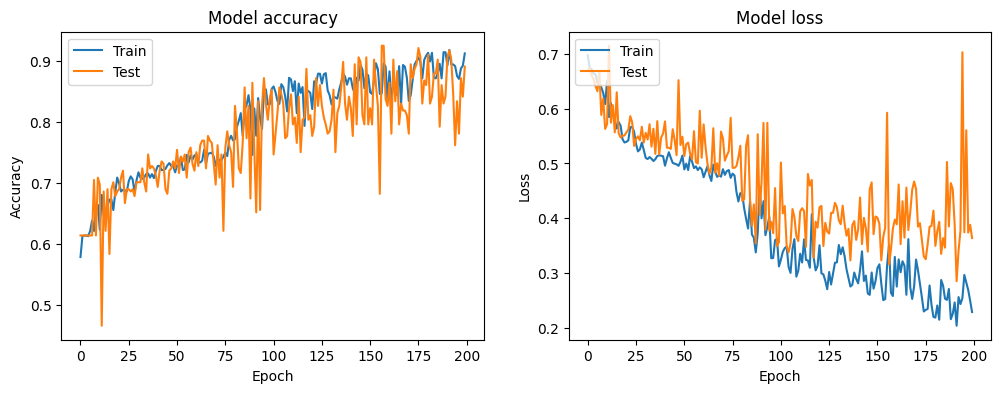

9/9 [==============================] - 0s 3ms/step


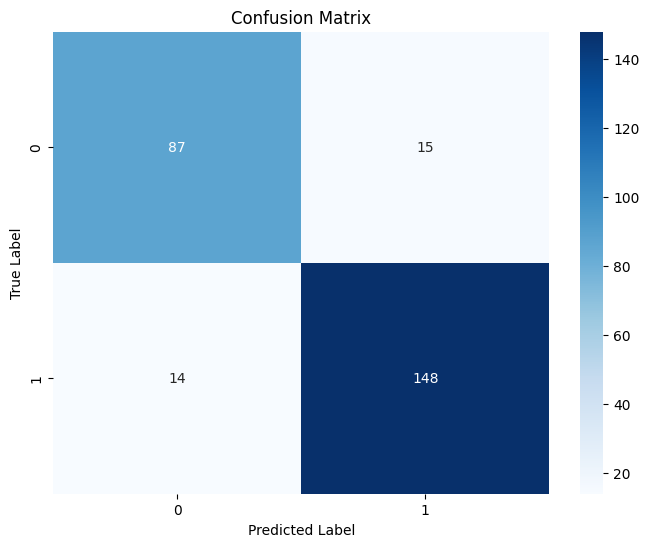

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from keras.optimizers import SGD, Adam, RMSprop, Nadam
# Build model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(512,input_dim = X_train.shape[1], activation = "relu"),
    tf.keras.layers.Dense(256,activation = "relu"),
    tf.keras.layers.Dense(128,activation = "relu"),
    tf.keras.layers.Dense(64,activation = "relu"),
    tf.keras.layers.Dense(32,activation = "relu"),
    tf.keras.layers.Dense(16,activation = "relu"),
    tf.keras.layers.Dense(8,activation = "relu"),
    tf.keras.layers.Dense(1, activation = "sigmoid")
])

# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train model and store the history
history = model.fit(X_train, y_train, epochs=200, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Predict the values from the test dataset
y_pred = model.predict(X_test)
y_pred_classes = np.round(y_pred).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
y_test.value_counts()

class
1    162
0    102
Name: count, dtype: int64

In [ ]:
model.save("/content/HEART data baru.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model
model = tf.keras.models.load_model("/content/HEART data baru.h5")

In [ ]:
# Data dummy
data_dummy = {
    'troponin': [0.003],
    'kcm': [1.99],
    'age': [55],
    'pressureheight': [160],
    'glucose' : [270],
    'presurelow': [77]
}

new_df = pd.DataFrame(data_dummy)

# Normalisasi fitur numerik
#numerical_columns = ['Cholesterol', 'MaxHR', 'Oldpeak','RestingBP']
#new_df[numerical_columns] = scaler.transform(new_df[numerical_columns])

# Prediksi dengan model
predictions = model.predict(new_df)

# Output hasil prediksi
print("Prediksi probabilitas Heart Disease:", predictions)

# Konversi probabilitas menjadi kelas biner
predicted_classes = (predictions > 0.5).astype("int32")
print("Prediksi kelas Heart Disease (1: Ya, 0: Tidak):", predicted_classes)


1/1 [==============================] - 1s 665ms/step
Prediksi probabilitas Heart Disease: [[1.]]
Prediksi kelas Heart Disease (1: Ya, 0: Tidak): [[1]]


In [ ]:
X.head()

,age,troponin,kcm,glucose,pressurehight,pressurelow
0,64,0.012,1.80,160.0,150,83
1,45,0.192,6.75,193.0,106,60
2,55,0.005,1.99,193.0,150,77
3,64,0.122,7.66,193.0,120,60
4,55,0.005,1.50,193.0,112,65


In [ ]:
# Data dummy
data_dummy = {
    'age': [80],
    'troponin': [100],
    'kcm': [100],
    'glucose' : [300],
    'pressureheight': [300],
    'presurelow': [100]
}

new_df = pd.DataFrame(data_dummy)

# Normalisasi fitur numerik
#numerical_columns = ['Cholesterol', 'MaxHR', 'Oldpeak','RestingBP']
#new_df[numerical_columns] = scaler.transform(new_df[numerical_columns])

# Prediksi dengan model
predictions = model.predict(new_df)

# Output hasil prediksi
print("Prediksi probabilitas Heart Disease:", predictions)

# Konversi probabilitas menjadi kelas biner
predicted_classes = (predictions > 0.5).astype("int32")
print("Prediksi kelas Heart Disease (1: Ya, 0: Tidak):", predicted_classes)

1/1 [==============================] - 0s 38ms/step
Prediksi probabilitas Heart Disease: [[1.]]
Prediksi kelas Heart Disease (1: Ya, 0: Tidak): [[1]]
